## Notebook Imports


In [207]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Gather Data

[Source: Data Source](https://archive.ics.uci.edu/ml/machine-learning-databases/00374/)

In [138]:
df=pd.read_csv("energydata_complete.csv")

## Data exploration with Pandas dataframes

In [3]:
df.head() # The top rows look like this:

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.tail() #Rows at the bottom look like this:

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


 ## Cleaning data - check for missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

## Visualizing Data - Histograms, Distributions and Bar Charts

Text(0, 0.5, 'Count of Appliances')

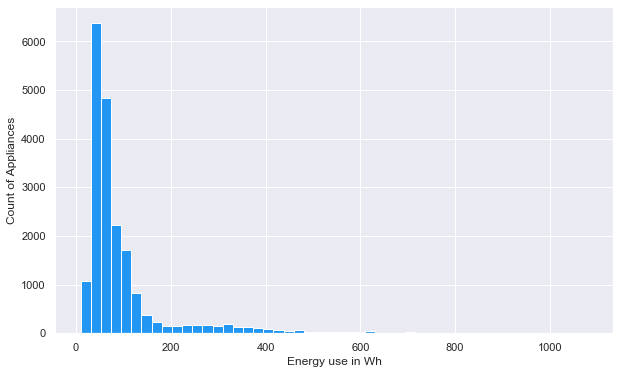

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df['Appliances'], bins=50, color='#2196f3')
plt.xlabel('Energy use in Wh')
plt.ylabel('Count of Appliances')

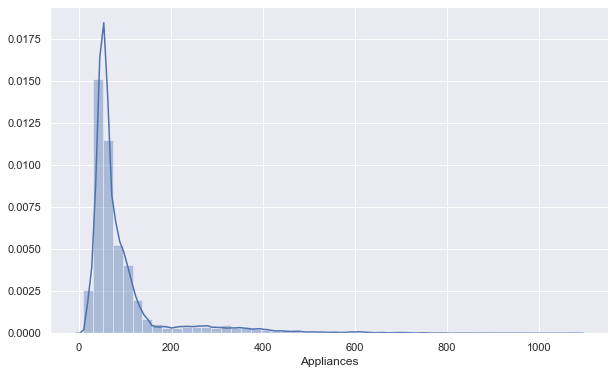

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df['Appliances'], bins=50)

Text(0, 0.5, 'Count of Lights')

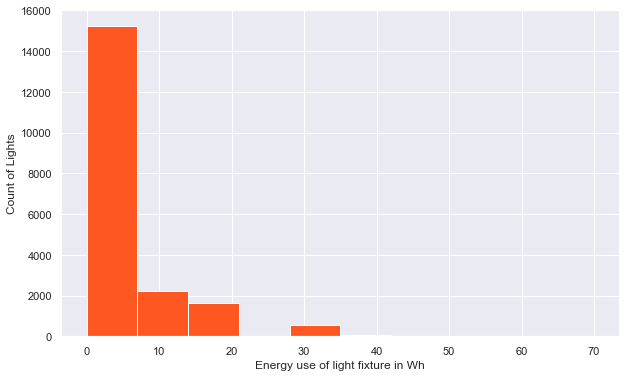

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df['lights'], color='#FF5722')
plt.xlabel('Energy use of light fixture in Wh')
plt.ylabel('Count of Lights') 

## Descriptive Statistics

In [20]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Correlation

### $$ \rho _{XY} = corr(X,Y)$$
### $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [21]:
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [22]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 <a list of 28 Text yticklabel objects>)

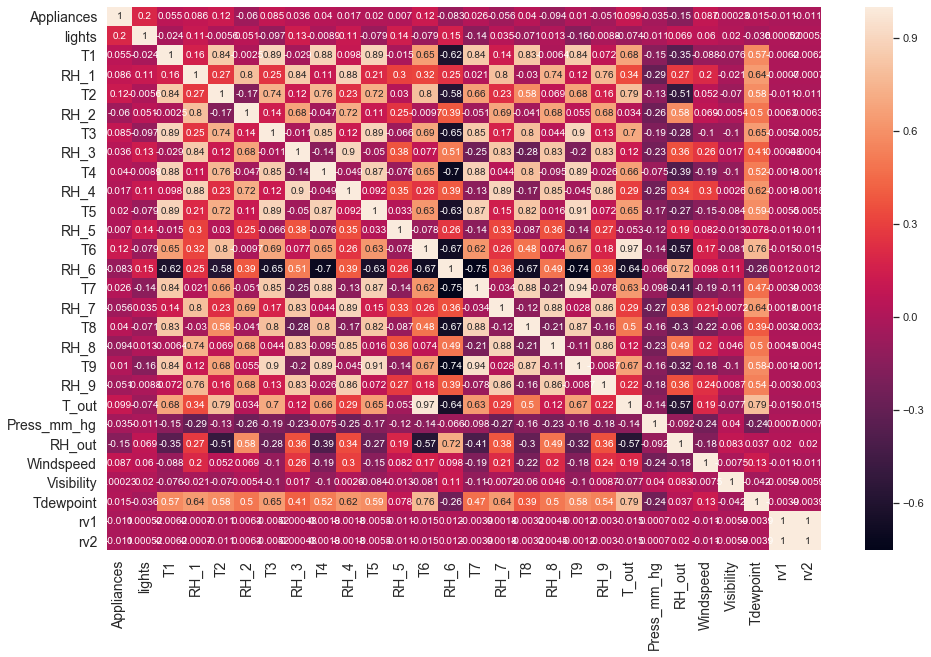

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Training & Test Dataset Split

In [190]:
df.drop(['date', 'lights'], axis=1, inplace=True)

In [191]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Normalizing dataset

In [192]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features = normalised_df.drop(columns=['Appliances'])
target = normalised_df['Appliances']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

## Multivariable Regression

In [196]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
y_pred = reg.predict(X_test)

In [206]:
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred), 3))
print('R-Squared:',round(r2_score(y_test, y_pred), 3))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error:', np.sqrt(round(mean_squared_error(y_test, y_pred), 3)))
print('Residual Sum of Squares:', np.sum(np.square(y_test - y_pred)))

Mean Absolute Error: 0.05
R-Squared: 0.149
Mean Squared Error: 0.008
Root Mean Squared Error: 0.08944271909999159
Residual Sum of Squares: 45.34808504778184


### Regularization

In [208]:
## LASSO
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

## RIDGE
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [210]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(reg, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [211]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,rv1,-2.759603e+10,0.000743,-0.000000
1,RH_2,-4.567008e-01,-0.401134,-0.000000
2,T_out,-3.218684e-01,-0.250765,0.000000
3,T2,-2.361850e-01,-0.193880,0.000000
4,T9,-1.899320e-01,-0.188584,-0.000000
5,RH_8,-1.575972e-01,-0.156596,-0.000110
6,RH_out,-7.768139e-02,-0.050541,-0.049557
7,RH_7,-4.461288e-02,-0.046291,-0.000000
8,RH_9,-3.979516e-02,-0.041701,-0.000000
9,T5,-1.565763e-02,-0.020727,-0.000000


## Quiz Linear Regression

In [218]:
X1 = pd.DataFrame(X_train['T2'], columns=['T2'])
y1 = pd.DataFrame(X_train['T6'], columns=['T6'])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [220]:
reg.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
y1_pred = reg.predict(X1_test)

In [229]:
print('Mean Absolute Error:', round(mean_absolute_error(y1_test, y1_pred), 2))
print('R-Squared:',round(r2_score(y1_test, y1_pred), 2))
print('Mean Squared Error:', round(mean_squared_error(y1_test, y1_pred), 3))
print('Root Mean Squared Error:', np.sqrt(round(mean_squared_error(y1_test, y1_pred), 3)))
print('Residual Sum of Squares:', round(np.sum(np.square(y1_test - y1_pred)), 2))
print('Coefficient of Determination', reg.score(y1_test, y1_pred))

Mean Absolute Error: 0.08
R-Squared: 0.64
Mean Squared Error: 0.011
Root Mean Squared Error: 0.10488088481701516
Residual Sum of Squares: T6    46.08
dtype: float64
Coefficient of Determination 0.14152981217939042


In [231]:
## LASSO
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X1_train, y1_train)

## RIDGE
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X1_train, y1_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [232]:
## LASSO
y_pred_ridge = ridge_reg.predict(X1_test)

In [234]:
print('RIDGE Root Mean Squared Error:', np.sqrt(round(mean_squared_error(y1_test, y_pred_ridge), 3)))

RIDGE Root Mean Squared Error: 0.10488088481701516


In [248]:
## LASSO NON-ZERO WEIGHT

non_zero = pd.DataFrame(final_weights['Lasso_weight'], columns=['Lasso_weight'])
non_zero

,Lasso_weight
0,-0.000000
1,-0.000000
2,0.000000
3,0.000000
4,-0.000000
5,-0.000110
6,-0.049557
7,-0.000000
8,-0.000000
9,-0.000000


In [252]:
## NEW RMSE WITH LASSO REGRESSION
lasso_regg = Lasso(alpha=0.001)
lasso_regg.fit(X_train, y_train)
## LASSO
y_pred_lasso = lasso_regg.predict(X_test)
print('LASSO Root Mean Squared Error:', np.sqrt(round(mean_squared_error(y_test, y_pred_lasso), 3)))

LASSO Root Mean Squared Error: 0.09486832980505137
